# Lab 6 Timeseries

Skills
- Reformat dates
- Extract parts of dates
- Visualize timeseries data

Data Source
- https://github.com/fivethirtyeight/uber-tlc-foil-response

Resources
- https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
- https://docs.python.org/2/library/time.html

In [172]:
# import modules
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Part A: Formatting Dates

In [50]:
# read in data for uber from jul14, aug14, sep14
jul = pd.read_csv('uber-raw-data-jul14.csv')
aug = pd.read_csv('uber-raw-data-aug14.csv')
sep = pd.read_csv('uber-raw-data-sep14.csv')
# print first few lines of each data set
jul.head()
aug.head()
sep.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [82]:
# combine uber data 
# HINT: concat see data wrangling module
uber = pd.concat([jul,aug,sep])

In [84]:
# separate date from time using string split
# HINT: df[['Date','Time']] = df['Date/Time'].str.split(' ', expand=True)
uber[['Date','Time']] = uber['Date/Time'].str.split(' ', expand=True)
uber

,Date/Time,Lat,Lon,Base,Date,Time
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,7/1/2014,0:03:00
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,7/1/2014,0:05:00
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,7/1/2014,0:06:00
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,7/1/2014,0:09:00
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,7/1/2014,0:20:00
...,...,...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,9/30/2014,22:57:00
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,9/30/2014,22:57:00
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,9/30/2014,22:58:00
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,9/30/2014,22:58:00


In [187]:
# convert date into format Year-Month-Day as in 2014-07-04
uber['Date'] = uber['Date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").strftime("%Y-%m-%d"))

NameError: name 'uberdate' is not defined

In [86]:
# convert time into format 24hr:Min:Sec
uber['Time'] = uber['Time'].apply(lambda x: datetime.datetime.strptime(x, "%H:%S:%M").strftime("%H:%M:%S"))

In [55]:
# read in data for American, Carmel, Dial
# HINT: If you are getting an error reading in the data you may need to set the encoding
# e.g. carmel = pd.read_csv("Carmel_B00256.csv", encoding="ISO-8859-1")
carmel = pd.read_csv("Carmel_B00256.csv", encoding="ISO-8859-1")
american = pd.read_csv("American_B01362.csv", encoding="ISO-8859-1")
dial = pd.read_csv("Dial7_B00887.csv", encoding="ISO-8859-1")

In [56]:
# Format American Data by changing the date and time variables to match the format of the uber data set
american['DATE'] = american['DATE'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").strftime("%Y-%m-%d"))
american['TIME'] = american['TIME'].apply(lambda x: datetime.datetime.strptime(x, "%H:%S:%M %p").strftime("%H:%M:%S"))
american

,DATE,TIME,PICK UP ADDRESS,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2014-07-01,12:00:00,"874 E 139th St Mott Haven, BX",NaN,NaN,NaN
1,2014-07-01,12:00:01,"628 E 141st St Mott Haven, BX",NaN,NaN,NaN
2,2014-07-01,12:00:01,"601 E 156th St South Bronx, BX",NaN,NaN,NaN
3,2014-07-01,12:00:01,"708 E 138th St Mott Haven, BX",NaN,NaN,NaN
4,2014-07-01,12:00:02,"700 E 140th St Mott Haven, BX",NaN,NaN,NaN
...,...,...,...,...,...,...
91707,2014-09-30,11:00:47,"593 Oak Ter Mott Haven, BX",NaN,NaN,NaN
91708,2014-09-30,11:00:48,"645 Westchester Ave South Bronx, BX",NaN,NaN,NaN
91709,2014-09-30,11:00:51,"625 Tinton Ave South Bronx, BX",NaN,NaN,NaN
91710,2014-09-30,11:00:54,"350 Saint Anns Ave Mott Haven, BX",NaN,NaN,NaN


In [58]:
# Format Carmel Data by changing the date and time variables to match the format of the uber data set
carmel['Date'] = carmel['Date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").strftime("%Y-%m-%d"))
carmel['Time'] = carmel['Time'].apply(lambda x: datetime.datetime.strptime(x, "%H:%M").strftime("%H:%M:%S"))
carmel

,Date,Time,PU_Adress,Base_No
0,2014-07-01,00:00:00,260 W 44 St NYC,B00256
1,2014-07-01,00:00:00,125 W 29 St Nyc,B00256
2,2014-07-01,00:00:00,141 W 28 St Nyc,B00256
3,2014-07-01,00:01:00,EWR,B00256
4,2014-07-01,00:07:00,JFK,B00256
...,...,...,...,...
256514,2014-09-30,23:53:00,JFK,B00256
256515,2014-09-30,23:55:00,5 Allen St Nyc,B00256
256516,2014-09-30,23:56:00,JFK,B00256
256517,2014-09-30,23:58:00,EWR,B00256


In [62]:
# Format Dial Data by changing the date and time variables to match the format of the uber data set
dial['Date'] = dial['Date'].apply(lambda x: datetime.datetime.strptime(x, "%Y.%m.%d").strftime("%Y-%m-%d"))
dial['Time'] = dial['Time'].apply(lambda x: datetime.datetime.strptime(x, "%H:%M").strftime("%H:%M:%S"))
dial

,Date,Time,State,PuFrom,Address,Street
0,2014-07-06,14:30:00,NY ...,MANHATTAN,50,MURRAY ST
1,2014-07-04,07:15:00,NY ...,MANHATTAN,143,AVENUE B
2,2014-07-05,05:45:00,NY ...,MANHATTAN,125,CHRISTOPHER ST
3,2014-07-06,04:30:00,NY ...,MANHATTAN,217,E 7 ST
4,2014-07-05,07:45:00,NY ...,MANHATTAN,521,W 26 ST
...,...,...,...,...,...,...
194987,2014-09-28,21:50:00,JFK DELTA TERM 4 P/U AREA C ...,Jfk,,
194988,2014-09-28,07:00:00,NY ...,MANHATTAN,112,W 78 ST
194989,2014-09-28,15:30:00,NY ...,MANHATTAN,601,W 57 ST
194990,2014-09-28,19:55:00,JFK DELTA TERM 2 CURBSIDE ...,NaN,,


# Part B: Visualize Timeseries Data

## Visualize by part of datetime for Uber Data Set

In [104]:
# extract the day of the week from the date variable in the uber data set and save this as a new column
# HINT: apply function, lambda function, weekday()
# uber["dayofweek"] = pd.to_datetime(uber["Date/Time"]).apply(lambda x: x.weekday())
uber["dayofweek"] = uber["Date/Time"].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y %H:%S:%M").strftime("%A"))
uber

,Date/Time,Lat,Lon,Base,Date,Time,dayofweek
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,2014-07-01,00:00:03,Tuesday
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,2014-07-01,00:00:05,Tuesday
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,2014-07-01,00:00:06,Tuesday
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,2014-07-01,00:00:09,Tuesday
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,2014-07-01,00:00:20,Tuesday
...,...,...,...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30,22:00:57,Tuesday
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30,22:00:57,Tuesday
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30,22:00:58,Tuesday
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30,22:00:58,Tuesday


In [188]:
# aggregate the uber data set by day of the week and count the number of rides per day of the week
# HINT: groupby
# HINT2: remember to reset the index and rename the columns
nuber = uber[["dayofweek","Date/Time"]].groupby(["dayofweek"]).agg("count")
nuber = nuber.reset_index()
nuber.columns=["dayofweek","rides_per_day"]
# print the first few rows
nuber.head()
# To interpret the Day of Week remeber that 0 = Monday, 1 = Tuesday, 2 = Wednesday etc...

,dayofweek,rides_per_day
0,Friday,411789
1,Monday,322110
2,Saturday,384542
3,Sunday,303105
4,Thursday,425832
5,Tuesday,407808
6,Wednesday,398346


<BarContainer object of 7 artists>

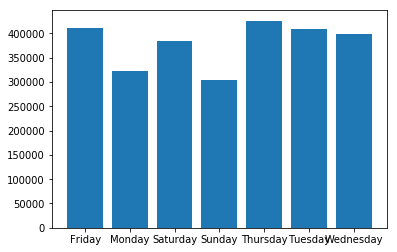

In [113]:
# create a plot to display the number of trips per day of the week
plt.bar(nuber["dayofweek"],nuber["rides_per_day"])

In [114]:
# extract the hour from the time variable in the uber data set and save this as a new column
# HINT: apply function, lambda function
uber["Hour"] = uber["Time"].apply(lambda x: datetime.datetime.strptime(x, "%H:%S:%M").strftime("%H"))
uber

,Date/Time,Lat,Lon,Base,Date,Time,dayofweek,Hour
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,2014-07-01,00:00:03,Tuesday,00
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,2014-07-01,00:00:05,Tuesday,00
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,2014-07-01,00:00:06,Tuesday,00
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,2014-07-01,00:00:09,Tuesday,00
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,2014-07-01,00:00:20,Tuesday,00
...,...,...,...,...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30,22:00:57,Tuesday,22
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30,22:00:57,Tuesday,22
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30,22:00:58,Tuesday,22
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30,22:00:58,Tuesday,22


In [115]:
# aggregate the uber data set by hour and count the number of rides per hour
# HINT: groupby
# HINT2: remember to reset the index and rename the columns
huber = uber[["Hour","Date/Time"]].groupby(["Hour"]).agg("count")
huber = huber.reset_index()
huber.columns = ["Hour","rides_per_hour"]
# print the first few rows
huber.head()

,Hour,rides_per_hour
0,00,63537
1,01,42105
2,02,29369
3,03,30364
4,04,34489


<BarContainer object of 24 artists>

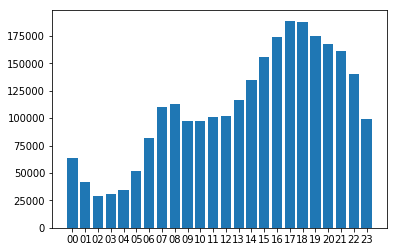

In [117]:
# create a plot to display the number of trips per hour
plt.bar(huber["Hour"],huber["rides_per_hour"])

## aggregate at different time periods by setting date as index

In [149]:
# tell python to use the date variable as the index for the uber data
#uber["Date"] = pd.to_datetime(uber["Date"])
uber.set_index("Date")

,Date/Time,Lat,Lon,Base,Time,dayofweek,Hour
Date,,,,,,,
2014-07-01,7/1/2014 0:03:00,40.7586,-73.9706,B02512,00:00:03,Tuesday,00
2014-07-01,7/1/2014 0:05:00,40.7605,-73.9994,B02512,00:00:05,Tuesday,00
2014-07-01,7/1/2014 0:06:00,40.7320,-73.9999,B02512,00:00:06,Tuesday,00
2014-07-01,7/1/2014 0:09:00,40.7635,-73.9793,B02512,00:00:09,Tuesday,00
2014-07-01,7/1/2014 0:20:00,40.7204,-74.0047,B02512,00:00:20,Tuesday,00
...,...,...,...,...,...,...,...
2014-09-30,9/30/2014 22:57:00,40.7668,-73.9845,B02764,22:00:57,Tuesday,22
2014-09-30,9/30/2014 22:57:00,40.6911,-74.1773,B02764,22:00:57,Tuesday,22
2014-09-30,9/30/2014 22:58:00,40.8519,-73.9319,B02764,22:00:58,Tuesday,22


In [180]:
# aggregate the uber data set by day to get the number of rides per day
# HINT: use resample
# HINT2: save this aggregate data frame as a new object e.g. uberperday
uberperday = uber.set_index("Date").resample("D").count()
del uberperday["Lat"], uberperday["Lon"], uberperday["Base"], uberperday["Time"], uberperday["dayofweek"], uberperday["Hour"]
uberperday.columns = ["number_of_rides"]
uberperday

,number_of_rides
Date,
2014-07-01,21228
2014-07-02,26480
2014-07-03,21597
2014-07-04,14148
2014-07-05,10890
...,...
2014-09-26,37504
2014-09-27,39468
2014-09-28,29656


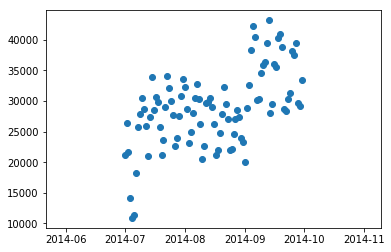

In [181]:
# create a scatterplot of the number of rides per day using the aggregated uber data (uberperday)
plt.scatter(uberperday.index,uberperday["number_of_rides"])

In [184]:
# aggregate the uberperday data set by week to get the average number of rides per day for each week
# HINT: use resample
# HINT2: save this aggregate data frame as a new object e.g. uberperweek
uberperweek = uberperday.resample("W").mean()
uberperweek

,number_of_rides
Date,
2014-07-06,17631.000000
2014-07-13,25453.000000
2014-07-20,28187.142857
2014-07-27,28429.000000
2014-08-03,28575.428571
2014-08-10,27654.428571
2014-08-17,26991.428571
2014-08-24,26527.714286
2014-08-31,25269.000000


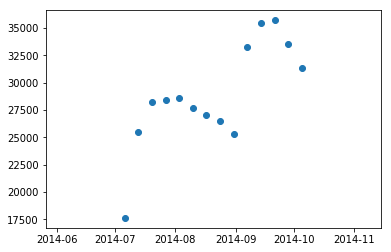

In [185]:
# create a scatterplot of the average number of rides per day per week using the aggregated uber data (uberperweek)
plt.scatter(uberperweek.index, uberperweek["number_of_rides"])